<a href="https://colab.research.google.com/github/alexandrosshomper/retention-analysis/blob/main/Retention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set Up

##Init

###Installs

In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Imports

In [ ]:
import pandas as pd
import numpy as np
import statistics
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from google.colab import files


In [ ]:
sns.set(rc={"figure.figsize":(16, 7)})

In [ ]:
figure(num=None,figsize=(150,100),dpi=120,facecolor='w',edgecolor='k')

<Figure size 18000x12000 with 0 Axes>

<Figure size 18000x12000 with 0 Axes>

###Load CSV into Dataframe

In [ ]:
#uploaded = files.upload()

In [ ]:
#df = pd.read_csv('Cohort Active Users Export - CSV Export.csv').fillna(0)
#df.head(7)

###Load Google Sheet into dataframe

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.auth import default
import gspread
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('Retention Analysis').sheet1
gsheet = worksheet.get_all_records()
print(gsheet)

[{'Cohorts': 'January', 'Januar': 3, 'Februar': 3, 'März': 0, 'April': 0, 'Mai': 1, 'Juni': 0, 'Juli': 1, 'August': 2, 'September': 1, 'Oktober': 2, 'November': 1, 'Dezember': 1}, {'Cohorts': 'February', 'Januar': 0, 'Februar': 12, 'März': 8, 'April': 7, 'Mai': 8, 'Juni': 5, 'Juli': 4, 'August': 4, 'September': 7, 'Oktober': 5, 'November': 4, 'Dezember': 2}, {'Cohorts': 'March', 'Januar': 0, 'Februar': 0, 'März': 18, 'April': 13, 'Mai': 11, 'Juni': 5, 'Juli': 9, 'August': 7, 'September': 7, 'Oktober': 7, 'November': 4, 'Dezember': 4}, {'Cohorts': 'April', 'Januar': 0, 'Februar': 0, 'März': 0, 'April': 37, 'Mai': 18, 'Juni': 5, 'Juli': 11, 'August': 8, 'September': 12, 'Oktober': 9, 'November': 8, 'Dezember': 9}, {'Cohorts': 'May', 'Januar': 0, 'Februar': 0, 'März': 0, 'April': 0, 'Mai': 35, 'Juni': 9, 'Juli': 15, 'August': 12, 'September': 15, 'Oktober': 14, 'November': 15, 'Dezember': 12}, {'Cohorts': 'June', 'Januar': 0, 'Februar': 0, 'März': 0, 'April': 0, 'Mai': 0, 'Juni': 12, 'Jul

###Functions

In [ ]:
def get_retention(dataframe,start:int,end:int): return dataframe.iloc[:,start:end].sum(axis=0).div(len(dataframe.index))

##Create Cohort Charts

In [ ]:
cohort_absolute_calendarweeks = pd.DataFrame(gsheet).set_index(['Cohorts']) 
# Mulit Index: cohort_absolute_calendarweeks.set_index([pd.Index(cohort_absolute_calendarweeks.index), 'Cohorts'])
cohort_absolute_calendarweeks.name='Cohorts Absolute Calendar Weeks'
cohort_absolute_calendarweeks.fillna(130, inplace = True)
cohort_absolute_calendarweeks

,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
Cohorts,,,,,,,,,,,,
January,3,3,0,0,1,0,1,2,1,2,1,1
February,0,12,8,7,8,5,4,4,7,5,4,2
March,0,0,18,13,11,5,9,7,7,7,4,4
April,0,0,0,37,18,5,11,8,12,9,8,9
May,0,0,0,0,35,9,15,12,15,14,15,12
June,0,0,0,0,0,12,6,4,6,1,4,1
July,0,0,0,0,0,0,13,7,7,5,5,4
August,0,0,0,0,0,0,0,12,11,8,7,1
September,0,0,0,0,0,0,0,0,81,40,34,9


In [ ]:
cohort_relative_calendarweeks = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_absolute_calendarweeks)): 
  cohort_relative_calendarweeks.iloc[i] = cohort_absolute_calendarweeks.iloc[i].diff().fillna(cohort_absolute_calendarweeks.iloc[i])
cohort_relative_calendarweeks.name='Cohorts Relative Calendar Weeks'
cohort_relative_calendarweeks

,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
Cohorts,,,,,,,,,,,,
January,3.0,0.0,-3.0,0.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,0.0
February,0.0,12.0,-4.0,-1.0,1.0,-3.0,-1.0,0.0,3.0,-2.0,-1.0,-2.0
March,0.0,0.0,18.0,-5.0,-2.0,-6.0,4.0,-2.0,0.0,0.0,-3.0,0.0
April,0.0,0.0,0.0,37.0,-19.0,-13.0,6.0,-3.0,4.0,-3.0,-1.0,1.0
May,0.0,0.0,0.0,0.0,35.0,-26.0,6.0,-3.0,3.0,-1.0,1.0,-3.0
June,0.0,0.0,0.0,0.0,0.0,12.0,-6.0,-2.0,2.0,-5.0,3.0,-3.0
July,0.0,0.0,0.0,0.0,0.0,0.0,13.0,-6.0,0.0,-2.0,0.0,-1.0
August,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,-1.0,-3.0,-1.0,-6.0
September,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,-41.0,-6.0,-25.0


In [ ]:
cohort_retention_percentage_calendarweeks = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_absolute_calendarweeks)):
  cohort_retention_percentage_calendarweeks.iloc[i] = cohort_absolute_calendarweeks.iloc[i].div(cohort_absolute_calendarweeks.iloc[i].values[i])
cohort_retention_percentage_calendarweeks.name='Cohorts Retention Percentage Calendar Weeks'
cohort_retention_percentage_calendarweeks.fillna(0)

,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
Cohorts,,,,,,,,,,,,
January,1.0,1.0,0.000000,0.000000,0.333333,0.000000,0.333333,0.666667,0.333333,0.666667,0.333333,0.333333
February,0.0,1.0,0.666667,0.583333,0.666667,0.416667,0.333333,0.333333,0.583333,0.416667,0.333333,0.166667
March,0.0,0.0,1.000000,0.722222,0.611111,0.277778,0.500000,0.388889,0.388889,0.388889,0.222222,0.222222
April,0.0,0.0,0.000000,1.000000,0.486486,0.135135,0.297297,0.216216,0.324324,0.243243,0.216216,0.243243
May,0.0,0.0,0.000000,0.000000,1.000000,0.257143,0.428571,0.342857,0.428571,0.400000,0.428571,0.342857
June,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.500000,0.333333,0.500000,0.083333,0.333333,0.083333
July,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.538462,0.538462,0.384615,0.384615,0.307692
August,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.916667,0.666667,0.583333,0.083333
September,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.493827,0.419753,0.111111


In [ ]:
cohort_churn_percentage_calendarweeks = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_absolute_calendarweeks)):
  cohort_churn_percentage_calendarweeks.iloc[i] = 1-(cohort_absolute_calendarweeks.iloc[i].div(cohort_absolute_calendarweeks.iloc[i].values[i]))
cohort_churn_percentage_calendarweeks.name='Cohorts Retention Percentage Calendar Weeks'
cohort_churn_percentage_calendarweeks.fillna(0)

,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
Cohorts,,,,,,,,,,,,
January,0.0,0.0,1.000000,1.000000,0.666667,1.000000,0.666667,0.333333,0.666667,0.333333,0.666667,0.666667
February,1.0,0.0,0.333333,0.416667,0.333333,0.583333,0.666667,0.666667,0.416667,0.583333,0.666667,0.833333
March,1.0,1.0,0.000000,0.277778,0.388889,0.722222,0.500000,0.611111,0.611111,0.611111,0.777778,0.777778
April,1.0,1.0,1.000000,0.000000,0.513514,0.864865,0.702703,0.783784,0.675676,0.756757,0.783784,0.756757
May,1.0,1.0,1.000000,1.000000,0.000000,0.742857,0.571429,0.657143,0.571429,0.600000,0.571429,0.657143
June,1.0,1.0,1.000000,1.000000,1.000000,0.000000,0.500000,0.666667,0.500000,0.916667,0.666667,0.916667
July,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.461538,0.461538,0.615385,0.615385,0.692308
August,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.083333,0.333333,0.416667,0.916667
September,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.506173,0.580247,0.888889


In [ ]:
cohort_absolute_weekscount = pd.DataFrame(columns=[0,1,2,3,4,5,6,7,8,9,10,11], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_absolute_calendarweeks)): 
  s = pd.Series(cohort_absolute_calendarweeks.iloc[i].values[i:])
  for j in range(len(s)):
    cohort_absolute_weekscount.iloc[i].values[j] = s.iloc[j]
cohort_absolute_weekscount.name='Cohorts Absolute Weeks Count'
cohort_absolute_weekscount = cohort_absolute_weekscount
cohort_absolute_weekscount

,0,1,2,3,4,5,6,7,8,9,10,11
Cohorts,,,,,,,,,,,,
January,3,3,0,0,1,0,1,2,1,2,1,1
February,12,8,7,8,5,4,4,7,5,4,2,NaN
March,18,13,11,5,9,7,7,7,4,4,NaN,NaN
April,37,18,5,11,8,12,9,8,9,NaN,NaN,NaN
May,35,9,15,12,15,14,15,12,NaN,NaN,NaN,NaN
June,12,6,4,6,1,4,1,NaN,NaN,NaN,NaN,NaN
July,13,7,7,5,5,4,NaN,NaN,NaN,NaN,NaN,NaN
August,12,11,8,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September,81,40,34,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_relative_weekscount = pd.DataFrame(columns=[0,1,2,3,4,5,6,7,8,9,10,11], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_relative_calendarweeks)): 
  s = pd.Series(cohort_relative_calendarweeks.iloc[i].values[i:])
  for j in range(len(s)):
    cohort_relative_weekscount.iloc[i].values[j] = s.iloc[j]
cohort_relative_weekscount.name='Cohorts Relative Weeks Count'
cohort_relative_weekscount = cohort_relative_weekscount
cohort_relative_weekscount

,0,1,2,3,4,5,6,7,8,9,10,11
Cohorts,,,,,,,,,,,,
January,3.0,0.0,-3.0,0.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,0.0
February,12.0,-4.0,-1.0,1.0,-3.0,-1.0,0.0,3.0,-2.0,-1.0,-2.0,NaN
March,18.0,-5.0,-2.0,-6.0,4.0,-2.0,0.0,0.0,-3.0,0.0,NaN,NaN
April,37.0,-19.0,-13.0,6.0,-3.0,4.0,-3.0,-1.0,1.0,NaN,NaN,NaN
May,35.0,-26.0,6.0,-3.0,3.0,-1.0,1.0,-3.0,NaN,NaN,NaN,NaN
June,12.0,-6.0,-2.0,2.0,-5.0,3.0,-3.0,NaN,NaN,NaN,NaN,NaN
July,13.0,-6.0,0.0,-2.0,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
August,12.0,-1.0,-3.0,-1.0,-6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September,81.0,-41.0,-6.0,-25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_retention_percentage_weekscount = pd.DataFrame(columns=[0,1,2,3,4,5,6,7,8,9,10,11], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_retention_percentage_calendarweeks)): 
  s = pd.Series(cohort_retention_percentage_calendarweeks.iloc[i].values[i:])
  for j in range(len(s)):
    cohort_retention_percentage_weekscount.iloc[i].values[j] = s.iloc[j]
cohort_retention_percentage_weekscount.name='Cohorts Retention Percentage Weeks Count'
cohort_retention_percentage_weekscount

,0,1,2,3,4,5,6,7,8,9,10,11
Cohorts,,,,,,,,,,,,
January,1.0,1.0,0.0,0.0,0.333333,0.0,0.333333,0.666667,0.333333,0.666667,0.333333,0.333333
February,1.0,0.666667,0.583333,0.666667,0.416667,0.333333,0.333333,0.583333,0.416667,0.333333,0.166667,NaN
March,1.0,0.722222,0.611111,0.277778,0.5,0.388889,0.388889,0.388889,0.222222,0.222222,NaN,NaN
April,1.0,0.486486,0.135135,0.297297,0.216216,0.324324,0.243243,0.216216,0.243243,NaN,NaN,NaN
May,1.0,0.257143,0.428571,0.342857,0.428571,0.4,0.428571,0.342857,NaN,NaN,NaN,NaN
June,1.0,0.5,0.333333,0.5,0.083333,0.333333,0.083333,NaN,NaN,NaN,NaN,NaN
July,1.0,0.538462,0.538462,0.384615,0.384615,0.307692,NaN,NaN,NaN,NaN,NaN,NaN
August,1.0,0.916667,0.666667,0.583333,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September,1.0,0.493827,0.419753,0.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_churn_percentage_weekscount = pd.DataFrame(columns=[0,1,2,3,4,5,6,7,8,9,10,11], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_churn_percentage_calendarweeks)): 
  s = pd.Series(cohort_churn_percentage_calendarweeks.iloc[i].values[i:])
  for j in range(len(s)):
    cohort_churn_percentage_weekscount.iloc[i].values[j] = s.iloc[j]
cohort_churn_percentage_weekscount.name='Cohorts Churn Percentage Weeks Count'
cohort_churn_percentage_weekscount

,0,1,2,3,4,5,6,7,8,9,10,11
Cohorts,,,,,,,,,,,,
January,0.0,0.0,1.0,1.0,0.666667,1.0,0.666667,0.333333,0.666667,0.333333,0.666667,0.666667
February,0.0,0.333333,0.416667,0.333333,0.583333,0.666667,0.666667,0.416667,0.583333,0.666667,0.833333,NaN
March,0.0,0.277778,0.388889,0.722222,0.5,0.611111,0.611111,0.611111,0.777778,0.777778,NaN,NaN
April,0.0,0.513514,0.864865,0.702703,0.783784,0.675676,0.756757,0.783784,0.756757,NaN,NaN,NaN
May,0.0,0.742857,0.571429,0.657143,0.571429,0.6,0.571429,0.657143,NaN,NaN,NaN,NaN
June,0.0,0.5,0.666667,0.5,0.916667,0.666667,0.916667,NaN,NaN,NaN,NaN,NaN
July,0.0,0.461538,0.461538,0.615385,0.615385,0.692308,NaN,NaN,NaN,NaN,NaN,NaN
August,0.0,0.083333,0.333333,0.416667,0.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September,0.0,0.506173,0.580247,0.888889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##User Activities

### Active Users

In [ ]:
active_users = pd.DataFrame(cohort_absolute_calendarweeks.sum(axis=0).astype(int), columns=['Active Users']).astype(object).T
active_users.name='Active Users'
active_users

,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
Active Users,3,15,26,57,73,36,59,56,147,118,124,86


###Churned Users

In [ ]:
churned_users = pd.DataFrame(cohort_relative_calendarweeks[cohort_relative_calendarweeks < 0].sum(axis=0).astype(int), columns=['Churned Users']).astype(object).T
churned_users.name='Churned Users'
churned_users.columns=active_users.columns
churned_users

,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
Churned Users,0,0,-7,-6,-21,-49,-7,-16,-2,-57,-28,-50


###New Users

In [ ]:
new_users = pd.DataFrame(cohort_relative_calendarweeks[cohort_relative_calendarweeks < 0].sum(axis=0).astype(int), columns=['New Users']).astype(object).T
for i in range(len(cohort_absolute_calendarweeks)):
  new_users.iloc[0].values[i]=cohort_absolute_calendarweeks.iloc[i].values[i]
  #print(cohort_absolute_calendarweeks.iloc[i].values[i])
new_users.columns=active_users.columns
new_users

,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
New Users,3,12,18,37,35,12,13,12,81,27,30,11


###Resurrected Users

In [ ]:
resurrected_users = pd.DataFrame(cohort_relative_calendarweeks[cohort_relative_calendarweeks > 0].sum(axis=0).astype(int), columns=['Resurrected Users']).astype(object)
for i in range(len(cohort_absolute_calendarweeks)):
  resurrected_users.iloc[i] = resurrected_users.iloc[i]-cohort_absolute_calendarweeks.iloc[i].values[i]
resurrected_users =resurrected_users.T
resurrected_users.columns=active_users.columns
resurrected_users

,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
Resurrected Users,0,0,0,0,2,0,17,1,12,1,4,1


###Retained Users

In [ ]:
retained_users = pd.DataFrame(active_users, columns=active_users.columns).astype(object)
for i in range(len(retained_users)):
  retained_users.iloc[i]=active_users.iloc[i]-new_users.iloc[i]-resurrected_users.iloc[i]
retained_users

,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
Active Users,0,3,8,20,36,24,29,43,54,90,90,74


###Quick Ratio

In [ ]:
quick_ratio = pd.DataFrame(cohort_relative_calendarweeks[cohort_relative_calendarweeks < 0].sum(axis=0).astype(int), columns=['Quick Ratio']).astype(object).T
for i in range(len(cohort_absolute_calendarweeks)):
  quick_ratio.iloc[0].values[i]=(new_users.iloc[0].values[i]+resurrected_users.iloc[0].values[i])/(churned_users.iloc[0].values[i]*-1)
quick_ratio.columns=active_users.columns
quick_ratio

<ipython-input-27-169b56e31629>:3: RuntimeWarning: divide by zero encountered in long_scalars
  quick_ratio.iloc[0].values[i]=(new_users.iloc[0].values[i]+resurrected_users.iloc[0].values[i])/(churned_users.iloc[0].values[i]*-1)


,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
Quick Ratio,inf,inf,2.571429,6.166667,1.761905,0.244898,4.285714,0.8125,46.5,0.491228,1.214286,0.24


###User Activity

In [ ]:
user_activity = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns], index=["Active Users", "Retained Users", "New Users","Churned Users", "Resurrected Users"])
user_activity.loc['Active Users']=active_users.iloc[0].values
user_activity.loc['New Users']=new_users.iloc[0].values
user_activity.loc['Retained Users']=retained_users.iloc[0].values
user_activity.loc['Churned Users']=churned_users.iloc[0].values
user_activity.loc['Resurrected Users']=resurrected_users.iloc[0].values
user_activity.loc['Quick Ratio']=quick_ratio.iloc[0].values
user_activity

,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
Active Users,3,15,26,57,73,36,59,56,147,118,124,86
Retained Users,0,3,8,20,36,24,29,43,54,90,90,74
New Users,3,12,18,37,35,12,13,12,81,27,30,11
Churned Users,0,0,-7,-6,-21,-49,-7,-16,-2,-57,-28,-50
Resurrected Users,0,0,0,0,2,0,17,1,12,1,4,1
Quick Ratio,inf,inf,2.571429,6.166667,1.761905,0.244898,4.285714,0.8125,46.5,0.491228,1.214286,0.24


###User Retention

In [ ]:
get_retention(cohort_retention_percentage_weekscount,0,11)

0          1.0
1     0.566049
2     0.337475
3     0.263638
4     0.203839
5     0.173964
6     0.150892
7     0.183164
8     0.101289
9     0.101852
10    0.041667
dtype: object

#Retention Plotting

##User Activity

###Active Users Chart
This chart tells you how many users have been active in each time period (months, weeks, or days).

####What you want to see
* **Each single timeperiod should ideally have a higher bar then the timeperiod before**
* **Ideally this chart should show an overall upwards trend:** indicating growth

####What you don't want to see
* **Overall downward trend or stagnation:** You are either loosing a lot of users, or not gaining new ones
* **Drops in one or more time periods:** This can indicate a bug, security issue, low performing acquisition, etc.


In [ ]:
active_users_chart = active_users.T.plot(kind='bar', color='blue').set(title='Active Users per Month', xlabel='Calendar Months 2022', ylabel='# of Users')

NameError: ignored

###Lifecycle Chart
*Aggregated charts can hide users churning!*

*While the "Active Users Chart" can give high-level indication of your products health & growth, it lacks the granularity to really understand what is happening.*

The Lifecycle Chart adds this granularity and tells you:
1. How many of those active users are new users.
2. How many are retained users.
3. How many users have churned (not used the product)
4. How many users were resurrected (started using the product again).

####What you want to see
* **Majority is retained users:** Your product is keeping its users, which means they see value in it.
* **Retained users grow over timeperiod** You convince more and more users to stick around, maybe existing users are referring your product. Retaining the same amout of users over 6 months is not good enough. 

####What you don't want to see
* **New users overweighing retained users:** Your user activity relies on constantly acquiring new users. This is not sustainable growth.
* **Churned users overweighting New Users:** You are loosing more users than you gain new users. This is a leaking bucket.

In [ ]:
lifecycle_chart = user_activity.iloc[1:].T.plot(kind='bar', stacked=True, color=['blue', 'green','red','purple']).set(title='User Lifecycle Chart', xlabel='Calendar Months 2022', ylabel='# of Users')

NameError: ignored

In [ ]:
user_activity_area = cohort_absolute_calendarweeks.iloc[1:].T.plot(kind='area', stacked=True).set(title='User Activity Area Cohort Chart', xlabel='Calendar Months 2022', ylabel='# of Users')

##Cohort Charts

###Retention Cohort Percentage
This shows the percentage of users stayed after a certain timeperiod.

In [ ]:
plt.figure(figsize=(16, 13))
retention_cohortchart = sns.heatmap(cohort_retention_percentage_weekscount.fillna(0), cmap="Greens", annot=True).set(title='Retention Cohort Chart', xlabel='Months after Signup')

###Churn Cohort Percentage
This shows the percentage of the starting cohort that was lost in each time period. 

In [ ]:
plt.figure(figsize=(16, 13))
churn_cohortchart = sns.heatmap(cohort_churn_percentage_weekscount.fillna(0), cmap="Reds", annot=True).set(title='Churn Cohort Chart', xlabel='Months after Signup')

##Retention

###Average Retention Curve

In [ ]:
#plt.figure(figsize=(16, 7))
plt.title("Retention Curve Average")
plt.xlabel("Months after Signup")
plt.ylabel("Retention")
plt.plot(get_retention(cohort_retention_percentage_weekscount,0,11).index, get_retention(cohort_retention_percentage_weekscount,0,11).values, color='black', label="all")
plt.legend()
plt.show()

In [ ]:
plt.title("Retention Curve Cohorts vs Average")
plt.xlabel("Months after Signup")
plt.ylabel("Retention")
plt.plot(get_retention(cohort_retention_percentage_weekscount,0,11).index, get_retention(cohort_retention_percentage_weekscount,0,11).values, color='black', label="all")
for i in range(len(cohort_retention_percentage_weekscount)): 
  plt.plot(cohort_retention_percentage_weekscount.iloc[i].index, cohort_retention_percentage_weekscount.iloc[i].values, label=cohort_retention_percentage_weekscount.iloc[i].name)
plt.legend()
plt.show()

##Usage Frequency
Frequency Histrogram (L28, etc.)
Frequency curve


In [ ]:
##Frequency Histogram on user level aggregated

In [ ]:
##Frequency Curve on user level aggregated

#Numbers & Trends

NameError: ignored

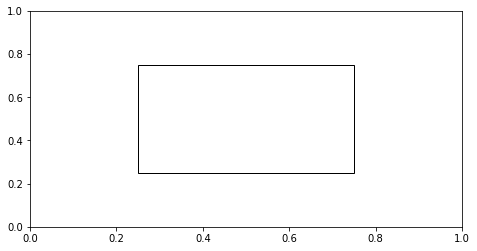

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig = plt.figure(figsize=(6, 3))
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

x=quick_ratio.iloc[0].values[-2]
y=quick_ratio.iloc[0].values[-1]
z=y-x

#Metric
ax.text(0.5*(left+right), 0.5*(bottom+top)+0.05, 'Quick Ratio',
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=20,
        transform=ax.transAxes)
#Value
if y < 1:
            ax.text(0.5*(left+right), 0.5*(bottom+top), y,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=32, color='red',
            transform=ax.transAxes)

elif y > 1:
            ax.text(0.5*(left+right), 0.5*(bottom+top), y,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=32, color='green',
            transform=ax.transAxes)
else:
            ax.text(0.5*(left+right), 0.5*(bottom+top), y,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=32, color='black',
            transform=ax.transAxes)

#Trend
if z/x < 0:
            ax.text(0.5*(left+right), 0.5*(bottom+top)-0.04, "-"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='red',
            transform=ax.transAxes)

elif z/x > 0:
            ax.text(0.5*(left+right), 0.5*(bottom+top)-0.04, "+"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='green',
            transform=ax.transAxes)
else:
            ax.text(0.5*(left+right), 0.5*(bottom+top)-0.04, "{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='black',
            transform=ax.transAxes)

ax.set_axis_off()
plt.show()

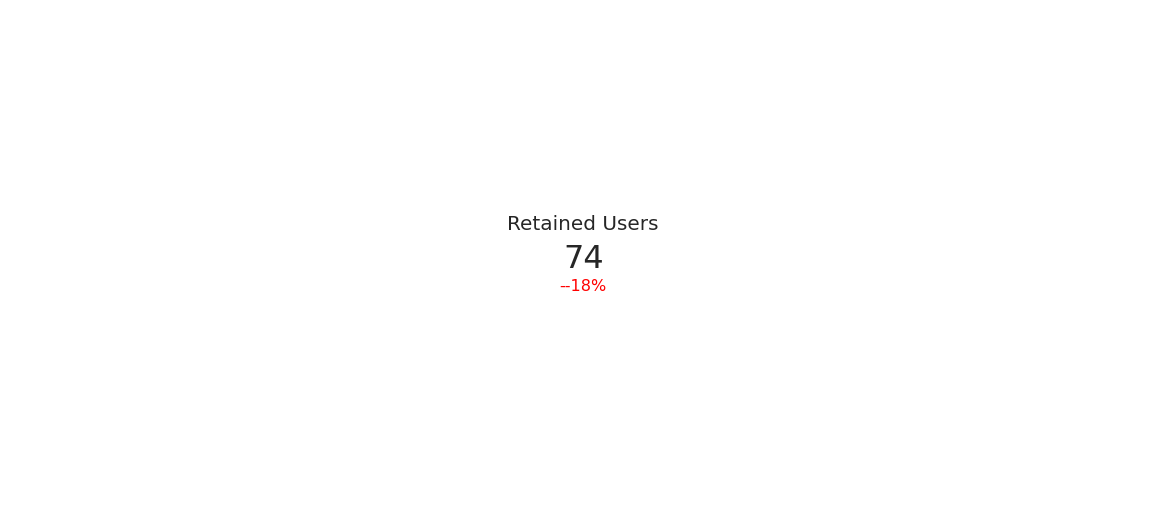

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

x=user_activity.loc['Retained Users'].values[-2]
y=user_activity.loc['Retained Users'].values[-1]
z=y-x

#Metric
ax.text(0.5*(left+right), 0.5*(bottom+top)+0.05, 'Retained Users',
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=20,
        transform=ax.transAxes)
#Value
ax.text(0.5*(left+right), 0.5*(bottom+top), y,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=32,
        transform=ax.transAxes)
#Trend

if z/x < 0:
            ax.text(0.5*(left+right), 0.5*(bottom+top)-0.04, "-"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='red',
            transform=ax.transAxes)

elif z/x > 0:
            ax.text(0.5*(left+right), 0.5*(bottom+top)-0.04, "+"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='green',
            transform=ax.transAxes)
else:
            ax.text(0.5*(left+right), 0.5*(bottom+top)-0.04, "{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='black',
            transform=ax.transAxes)

ax.set_axis_off()
plt.show()

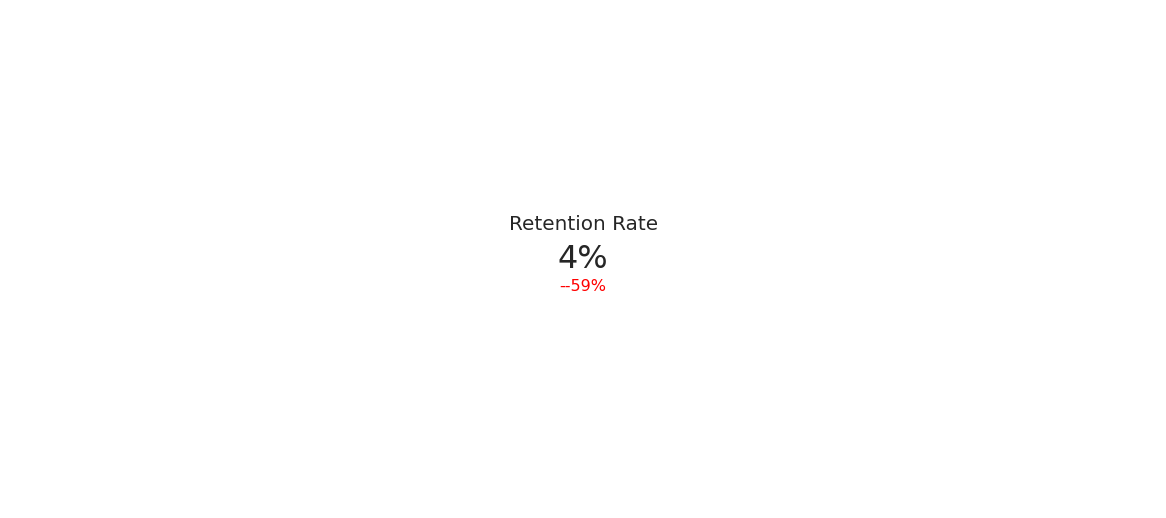

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)
x=get_retention(cohort_retention_percentage_weekscount,0,11).values[-2]
y=get_retention(cohort_retention_percentage_weekscount,0,11).values[-1]
z=y-x
#Metric
ax.text(0.5*(left+right), 0.5*(bottom+top)+0.05, 'Retention Rate',
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=20,
        transform=ax.transAxes)
#Value
ax.text(0.5*(left+right), 0.5*(bottom+top), "{0:.0f}%".format(y * 100),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=32,
        transform=ax.transAxes)
#Trend
if z/x < 0:
            ax.text(0.5*(left+right), 0.5*(bottom+top)-0.04, "-"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='red',
            transform=ax.transAxes)
elif z/x > 0:
            ax.text(0.5*(left+right), 0.5*(bottom+top)-0.04, "+"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='green',
            transform=ax.transAxes)
else:
            ax.text(0.5*(left+right), 0.5*(bottom+top)-0.04, "{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='black',
            transform=ax.transAxes)

ax.set_axis_off()
plt.show()

#Playground

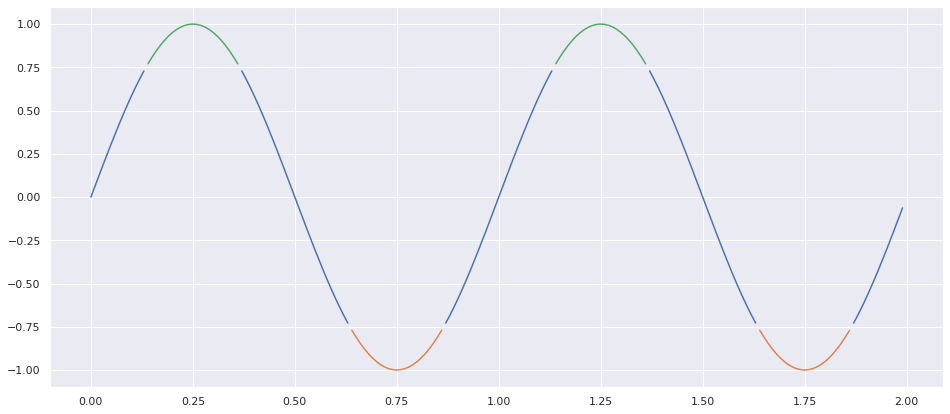

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)

upper = 0.77
lower = -0.77

supper = np.ma.masked_where(s < upper, s)
slower = np.ma.masked_where(s > lower, s)
smiddle = np.ma.masked_where((s < lower) | (s > upper), s)

fig, ax = plt.subplots()
ax.plot(t, smiddle, t, slower, t, supper)
plt.show()